In [2]:
from qiskit_ionq import IonQProvider, ionq_job
ionq_provider = IonQProvider("mycsEhnoIgARQdch53Zm7KJUePwFD0Wr")
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.tools.visualization import plot_histogram, array_to_latex
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
import matplotlib.pyplot as plt
import pylab as pl

import numpy as np
import matplotlib.colorbar as cbar
from matplotlib.colors import LogNorm

In [3]:
f = open("C:/Users/cbk92/Desktop/VSC_code/IONQ/ID_time/ID_10_intersect.txt",'r')
ID_after=f.readlines()



f.close()

In [4]:
for i in range(20):
    ID_after[i] = ID_after[i].strip('\n')

In [5]:
tf = open("C:/Users/cbk92/Desktop/VSC_code/IONQ/ID_time/intersect_time.txt",'r')
time_after=tf.readlines()
tf.close()

In [6]:
for i in range(20):
    time_after[i] = time_after[i].strip('\n')

In [7]:
for i in range(20):
    time_after[i] = float(time_after[i])

In [8]:
sim_backend = ionq_provider.get_backend('ionq_simulator')

qpu_backend = ionq_provider.get_backend('ionq_qpu')

In [9]:
row=[]
for i in range(2):
    for j in range(2):
        for k in range(2):
            for l in range(2):
                for m in range(2):
                    row.append(str(i)+str(j)+str(k)+str(l)+str(m))

In [10]:
for i in range(20):
    job_ret = qpu_backend.retrieve_job(ID_after[i])
    probs = job_ret.get_probabilities()
    counts = job_ret.get_counts()
    for k in range(32):
        if row[k] not in probs.keys():
            probs[row[k]] = 0
    probs_tup = sorted(probs.items())
    probs_list = []
    for j in range(32):
        a=probs_tup[j][1]
        probs_list.append(a)
    probs_arr = np.array(probs_list)
    if i == 0:
        all_probs = probs_arr
    else:
        all_probs = np.vstack((all_probs,probs_arr))

In [11]:
xtk=[]
for i in range(32):
    xtk.append(i+0.5)
y_loc=[]
for i in range(20):
    if float(time_after[i])==0:
        continue
    else:
        y_loc.append(round(float(time_after[i])-float(time_after[i-1]),5))

In [12]:
time_after[0]=0.00

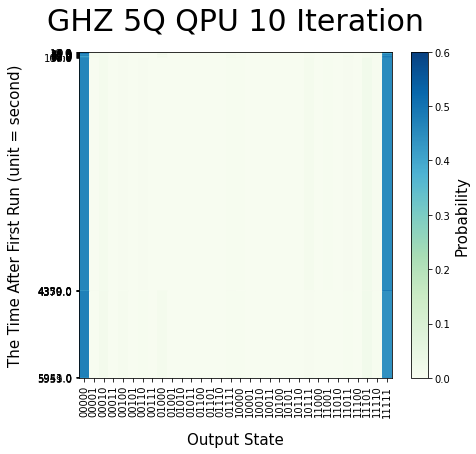

In [13]:
fig,ax=pl.subplots(1,figsize=(7,6))
plt.xlabel('Output State',fontsize = 15,labelpad = 15)
plt.ylabel('The Time After First Run (unit = second)',fontsize = 15,labelpad = 15)

plt.title('GHZ 5Q QPU 10 Iteration',fontsize = 30,y=1.05)
normal = pl.Normalize(0,0.6)
colors=pl.cm.GnBu(normal(all_probs))

plt.yticks(time_after,labels=time_after,fontsize = 10)
plt.xticks(xtk,labels=row,rotation=90,fontsize = 10)
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음

for i in range(19):
    for j in range(32):
        rect = pl.Rectangle((j,time_after[i]),1,float(y_loc[i]),
        color=colors[i][j])
        ax.add_patch(rect)
plt.gca().invert_yaxis()
cax, _ = cbar.make_axes(ax) 
cb2 = cbar.ColorbarBase(cax, cmap=pl.cm.GnBu,norm=normal)
cb2.set_label(label='Probability',size=15) 
ax.set_xlim(0,32)
plt.show()

In [14]:
ideal = []
for i in range(32):
    if i == 0 or i == 31:
        ideal.append(0.5)
    else:
        ideal.append(0)

In [15]:
for i in range(20):
    err_list = []
    for j in range(32):
        a=ideal[j]-all_probs[i][j]
        err_list.append(a)
    err_arr = np.array(err_list)
    if i == 0:
        all_err = err_arr
    else:
        all_err = np.vstack((all_err,err_arr))  

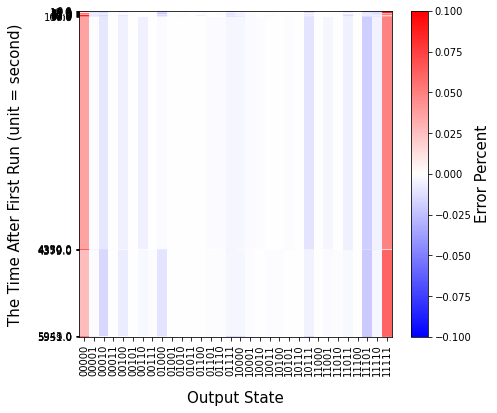

In [16]:
fig,ax=pl.subplots(1,figsize=(7,6))
normal = pl.Normalize(-0.1,0.1)
colors=pl.cm.bwr(normal(all_err))
plt.xlim(0,32)

plt.yticks(time_after,labels=time_after,fontsize = 10)
plt.xticks(xtk,labels=row,rotation=90,fontsize = 10)
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음
plt.xlabel('Output State',fontsize = 15,labelpad = 15)
plt.ylabel('The Time After First Run (unit = second)',fontsize = 15,labelpad = 15)


for i in range(19):
    for j in range(32):
        rect = pl.Rectangle((j,time_after[i]),1,float(y_loc[i]),
        color=colors[i][j])
        ax.add_patch(rect)

plt.gca().invert_yaxis()
cax, _ = cbar.make_axes(ax) 
ax.set_xlim(0,32)
cb2 = cbar.ColorbarBase(cax, cmap=pl.cm.bwr,norm=normal)
cb2.set_label(label='Error Percent',size=15)
plt.subplot(111)
plt.show()

In [17]:
avg_err=[]

for i in range(20):
    total=0
    for j in range(32):
        total += abs(all_err[i][j])
    average = total/32
    avg_err.append(average)

In [18]:
xtkk = [0.003,0.004,0.005,0.006,0.007]

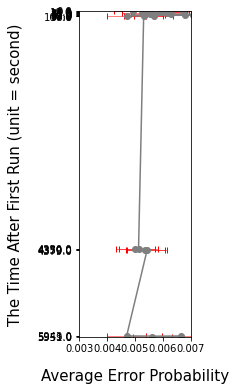

In [19]:
fig,ax=pl.subplots(1,figsize=(2,6))

lineStyle={"linestyle":"-", "linewidth":0, "markeredgewidth":1, "elinewidth":0.5, "capsize":3}

plt.xlim(0.003,0.007)
plt.ylim(0,0.0375)
plt.yticks(ticks=time_after,labels=time_after,fontsize = 10)
plt.xticks(xtkk,labels=xtkk,fontsize = 10)
plt.xlabel('Average Error Probability',fontsize = 15,labelpad = 15)
plt.ylabel('The Time After First Run (unit = second)',fontsize = 15,labelpad = 15)
plt.gca().invert_yaxis()


ax.errorbar(avg_err,time_after,xerr=np.std(avg_err),**lineStyle,ecolor='red')


plt.plot(avg_err,time_after,color='#7f7f7f',marker='o')

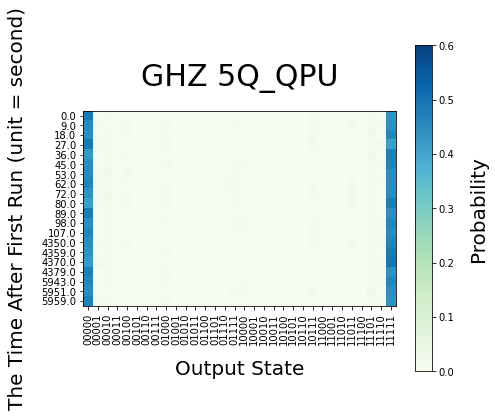

In [35]:
plt.figure(figsize=(7,6))
plt.imshow(all_probs,cmap='GnBu')
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 10)
plt.yticks(range(len(time_after)),labels=time_after,fontsize = 10)
plt.xlabel('Output State',fontsize = 20,labelpad = 15)
plt.ylabel('The Time After First Run (unit = second)',fontsize = 20,labelpad = 15)
plt.title('GHZ 5Q_QPU',fontsize = 30, y=1.1)
plt.clim(0,0.6)
cbar = plt.colorbar()
cbar.set_label('Probability',fontsize = 20,labelpad = 15)
plt.show()

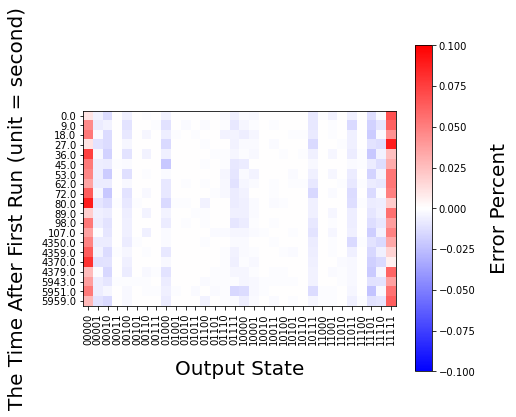

In [36]:
plt.figure(figsize=(7,6))
plt.imshow(all_err,cmap='bwr')
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 10)
plt.yticks(range(len(time_after)),labels=time_after,fontsize = 10)
plt.xlabel('Output State',fontsize = 20,labelpad = 15)
plt.ylabel('The Time After First Run (unit = second)',fontsize = 20,labelpad = 15)
plt.clim(-0.1,0.1)
cbar = plt.colorbar()
cbar.set_label('Error Percent',fontsize = 20,labelpad = 15)
plt.show()

In [22]:
time_after1=[]
time_after2=[]
for i in range(20):
    if i%2==1:
        time_after1.append(time_after[i])
    else:
        time_after2.append(time_after[i])

In [23]:
all_err1=[]
all_err2=[]
for i in range(20):
    if i%2==1:
        all_err1.append(all_err[i])
    else:
        all_err2.append(all_err[i])


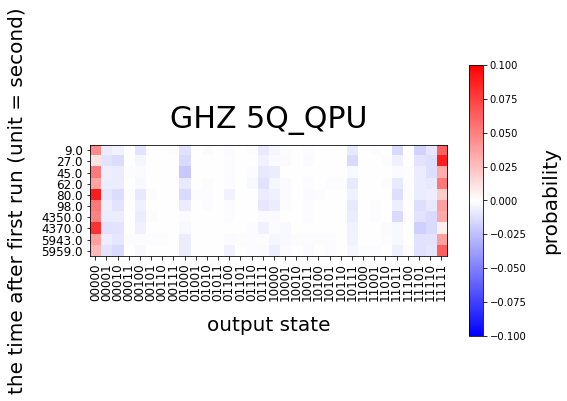

In [24]:
plt.figure(figsize=(8,5))
plt.imshow(all_err1,cmap='bwr')
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 12)
plt.yticks(range(len(time_after1)),labels=time_after1,fontsize = 12)
plt.xlabel('output state',fontsize = 20,labelpad = 15)
plt.ylabel('the time after first run (unit = second)',fontsize = 20,labelpad = 15)
plt.title('GHZ 5Q_QPU',fontsize = 30, y = 1.1)
plt.clim(-0.1,0.1)
cbar = plt.colorbar()
cbar.set_label('probability',fontsize = 20,labelpad = 15)
plt.show()

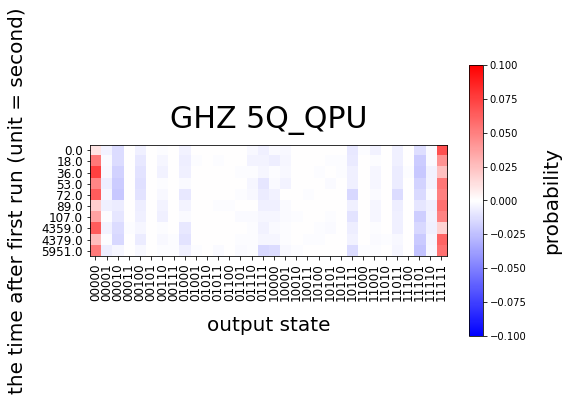

In [25]:
plt.figure(figsize=(8,5))
plt.imshow(all_err2,cmap='bwr')
#norm=LogNorm(vmin=0.0001,vmax=1) 넣으면 로그스케일, 대신 0이 표현안되는데 해결책 못찾음
plt.xticks(range(len(row)),labels=row,rotation=90,fontsize = 12)
plt.yticks(range(len(time_after2)),labels=time_after2,fontsize = 12)
plt.xlabel('output state',fontsize = 20,labelpad = 15)
plt.ylabel('the time after first run (unit = second)',fontsize = 20,labelpad = 15)
plt.title('GHZ 5Q_QPU',fontsize = 30, y = 1.1)
plt.clim(-0.1,0.1)
cbar = plt.colorbar()
cbar.set_label('probability',fontsize = 20,labelpad = 15)
plt.show()